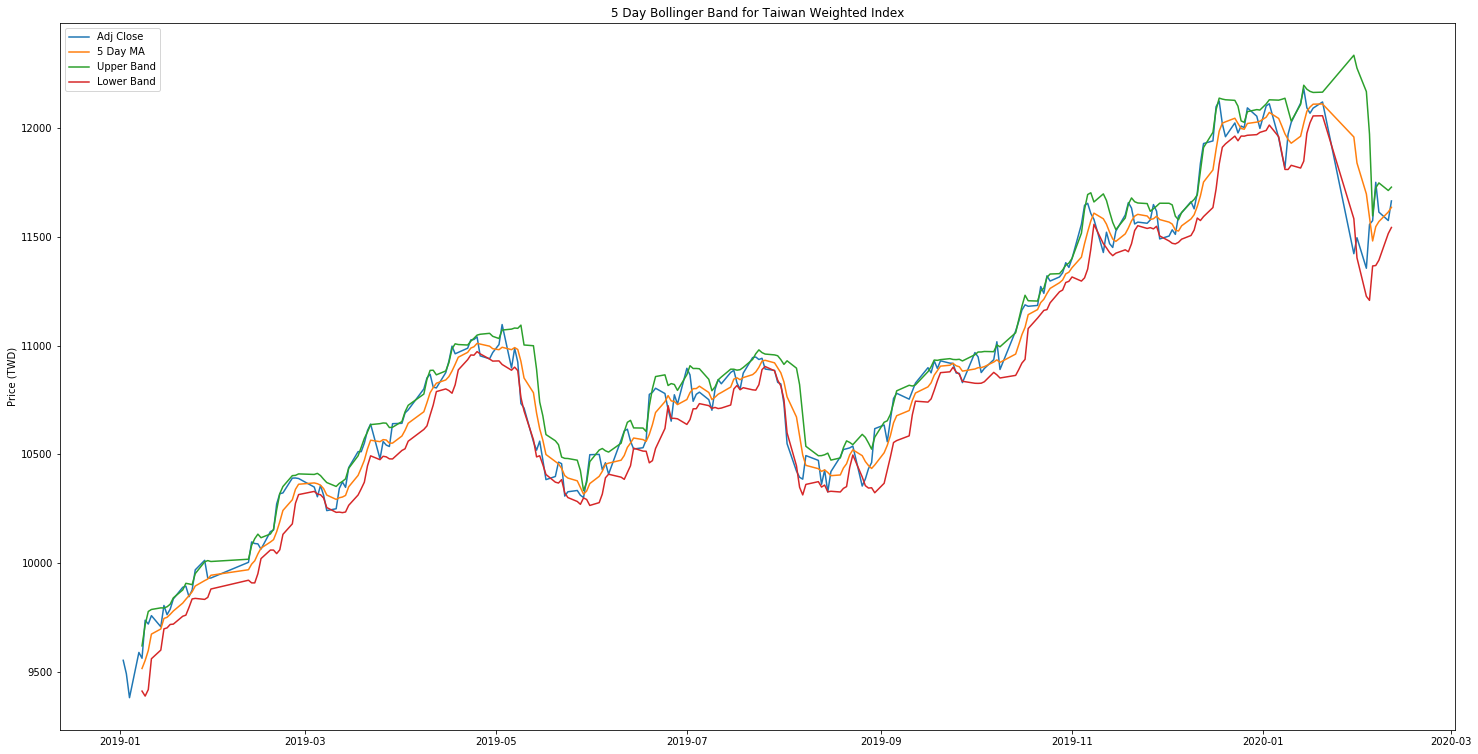

          High          Low         Open        Close   Volume    Adj Close  \
0  9737.679688  9542.519531  9725.269531  9554.139648  1239100  9554.139648   
1  9554.530273  9474.469727  9494.250000  9492.419922  1560800  9492.419922   
2  9427.240234  9319.280273  9427.240234  9382.509766  1842100  9382.509766   

   5 Day MA  5 Day STD  Upper_Middle Band  Lower_Middle Band  Upper Band  \
0       NaN        NaN                NaN                NaN         NaN   
1       NaN        NaN                NaN                NaN         NaN   
2       NaN        NaN                NaN                NaN         NaN   

   Lower Band       Date  
0         NaN 2019-01-02  
1         NaN 2019-01-03  
2         NaN 2019-01-04  


In [2]:
import matplotlib.pyplot as plt 
import pandas_datareader.data as pdr 
import datetime as dt 
import numpy as np 
import pandas as pd 
start = dt.datetime(2019,1,1)
end = dt.datetime(2020,2,10)
dff = pdr.DataReader('^TWII','yahoo',start,end)

# 5 day moving average
dff['5 Day MA'] = dff['Adj Close'].rolling(window=5).mean()
dff['5 Day STD'] = dff['Adj Close'].rolling(window=5).std() 

dff['Upper_Middle Band'] = dff['5 Day MA'] + (dff['5 Day STD'] * 1)
dff['Lower_Middle Band'] = dff['5 Day MA'] - (dff['5 Day STD'] * 1)
# 1.25 sd 
dff['Upper Band'] = dff['5 Day MA'] + (dff['5 Day STD'] * 1.25)
dff['Lower Band'] = dff['5 Day MA'] - (dff['5 Day STD'] * 1.25)

dff['Date'] = list(dff.index)

dff.set_index(np.arange(dff.shape[0]),inplace = True)
                                             
                                                                                                    
plt.figure(figsize=(25,13),linewidth = 0.5)
plt.plot(dff['Date'],dff[['Adj Close', '5 Day MA', 'Upper Band', 'Lower Band']])
plt.title('5 Day Bollinger Band for Taiwan Weighted Index')
plt.ylabel('Price (TWD)')
plt.legend(loc='upper left', labels =['Adj Close', '5 Day MA', 'Upper Band', 'Lower Band'])
plt.show()
print(dff.head(3))

In [3]:
import numpy as np
import pandas as pd 
dff.dropna(inplace = True, axis = 0)
k = np.arange(dff.shape[0])
dff.set_index(k,inplace =True)

upper_band = list(round(dff['Upper Band']))
lower_band = list(round(dff['Upper Band']))
print(type(list(lower_band)))
upper_middle_band = list(round(dff['Upper_Middle Band']))
lower_middle_band = list(round(dff['Lower_Middle Band']))
D20_MA = list(round(dff['5 Day MA']))

price = dff['Adj Close']
long = 0 
short = 0
enter_price = []
ret = []
dic_position = {}
short_enter_leave = 0
long_enter_leave = 0
buy = pd.DataFrame(columns = ['Date', 'long', 'short'])
sell = pd.DataFrame(columns = ['Date', 'long', 'short'])


def position(short, long):
    if short == 0 and long == 0:
        return 0
    elif short == 0 and long == 1:
        return 1
    if short == 1 and long ==0:
        return -1
    elif short == 1 and long == 1:
        return -9999

buy_date = []
buy_long = []
sell_date = []
sell_short = []
status = []
    
counter = 0
for i in range(1, len(price)):
    counter +=1
    overlap = 0
    pos = position(short, long)
    if price[i] > upper_band[i] and price[i-1] < upper_band[i-1] and pos == 0:
        status.append('sell')
        short = 1 
        enter_price.append(price[i])
        short_enter_leave +=1
        sell_date.append(dff.loc[i,'Date'])
        sell_short.append(dff.loc[i,'Adj Close'])
        dic_position['short_{}_enter_price'.format(dff.index[i])] = enter_price[-1]
        
    elif short == 1 and price[i] < D20_MA[i]:
        status.append('buy')
        buy_date.append(dff.loc[i,'Date'])
        buy_long.append(dff.loc[i,'Adj Close'])
        
        short = 0
        enter_price.append(price[i])
        retturn = round(abs(enter_price[-1]-enter_price[-2])/enter_price[-2],3)
        ret.append(retturn)
        dic_position['short_{}_leave_ret'.format(dff.index[i])] = retturn
        dic_position['short_{}_leave_price'.format(dff.index[i])] = enter_price[-1]
        
        overlap = 1
        short_enter_leave -=1
    pos = position(short, long)
    if price[i] < lower_band[i] and price[i-1] > lower_band[i-1] and pos == 0 and overlap == 0:
        status.append('buy')
        buy_date.append(dff.loc[i,'Date'])
        buy_long.append(dff.loc[i,'Adj Close'])
        long = 1 
        enter_price.append(price[i])
        long_enter_leave+=1
        dic_position['long_{}_enter_price'.format(dff.index[i])] = enter_price[-1]
    elif price[i] >D20_MA[i-1] and long == 1:            
        status.append('sell')
        sell_date.append(dff.loc[i,'Date'])
        sell_short.append(dff.loc[i,'Adj Close'])
        long = 0 
        enter_price.append(price[i])
        retturn = round(abs(enter_price[-1]-enter_price[-2])/enter_price[-2],3)
        ret.append(retturn)
        dic_position['long_{}_leave_ret'.format(dff.index[i])] = retturn
        dic_position['long_{}_leave_price'.format(dff.index[i])] = enter_price[-1]

        long_enter_leave-=1
        
# print(dic_position)

sell = pd.DataFrame(columns = ['Date','short'])
sell['Date'] = sell_date
sell['short'] = sell_short
buy['Date'] = buy_date
buy['long'] = buy_long
buy.dropna(inplace = True, axis = 1)
print('5 day movin average with 1.5 standard deviation')
print('total return: ', sum(ret))
print('average return:', sum(ret)/len(ret))
print('Number_of_Enter_Leave:', len(ret))


<class 'list'>
5 day movin average with 1.5 standard deviation
total return:  0.29500000000000004
average return: 0.011800000000000001
Number_of_Enter_Leave: 25


In [14]:
col = [ 'Date','Adj Close' ,'5 Day MA','Upper Band', 'Lower Band', 'Enter_leave','status']
df = pd.DataFrame(columns = col)
index = np.arange(dff.shape[0])
dff.set_index(index, inplace = True )
dff.dropna(inplace = True, axis = 0)
df[['Date','Adj Close' ,'5 Day MA','Upper Band', 'Lower Band']] = dff[['Date','Adj Close' ,'5 Day MA','Upper Band', 'Lower Band']]
print(df.head())
for i in range(len(sell_short)):
    for j in range(dff.shape[0]):
        if dff['Date'].iloc[j] == sell_date[i]:
            df['Enter_leave'].iloc[j] = sell_short[i]
            df['status'].iloc[j] = 'sell'
for i in range(len(sell_short)):
    for j in range(dff.shape[0]):          
        if dff['Date'].iloc[j] == buy_date[i]:
            df['Enter_leave'].iloc[j] = buy_long[i]
            df['status'].iloc[j] = 'buy'
        
# df.dropna(inplace =True, axis = 0)
# k = np.arange(df.shape[0])
# df.set_index('Date', inplace = True )




        Date    Adj Close     5 Day MA   Upper Band   Lower Band Enter_leave  \
0 2019-01-08  9563.599609  9516.593750  9620.454227  9412.733273         NaN   
1 2019-01-09  9738.309570  9553.427734  9717.100444  9389.755025         NaN   
2 2019-01-10  9720.690430  9599.081836  9778.504289  9419.659383         NaN   
3 2019-01-11  9759.400391  9674.459961  9787.655476  9561.264446         NaN   
4 2019-01-14  9708.219727  9698.043945  9795.024982  9601.062908         NaN   

  status  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


/Users/kelly/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
df

,Adj Close,20 Day MA,Upper Band,Lower Band,Enter_leave,status
Date,,,,,,
2019-01-09,9738.309570,9553.427734,9717.100444,9389.755025,9738.31,sell
2019-01-23,9846.400391,9851.134180,9905.081696,9797.186664,9846.4,buy
2019-01-25,9969.610352,9895.438281,9952.305820,9838.570742,9969.61,sell
2019-01-30,9932.259766,9944.782031,10007.978945,9881.585117,9932.26,buy
2019-02-12,10097.740234,9995.833984,10081.827301,9909.840668,10097.7,sell
2019-02-15,10064.780273,10069.272070,10117.287734,10021.256407,10064.8,buy
2019-02-18,10145.280273,10097.478125,10134.313696,10060.642554,10145.3,sell
2019-03-04,10349.879883,10368.889844,10407.846563,10329.933125,10349.9,buy
2019-03-15,10439.240234,10350.964258,10435.958147,10265.970369,10439.2,sell


In [13]:
# import numpy as np
# df1 = df.replace(np.nan, ' ', regex=True)
# print(df1.head())

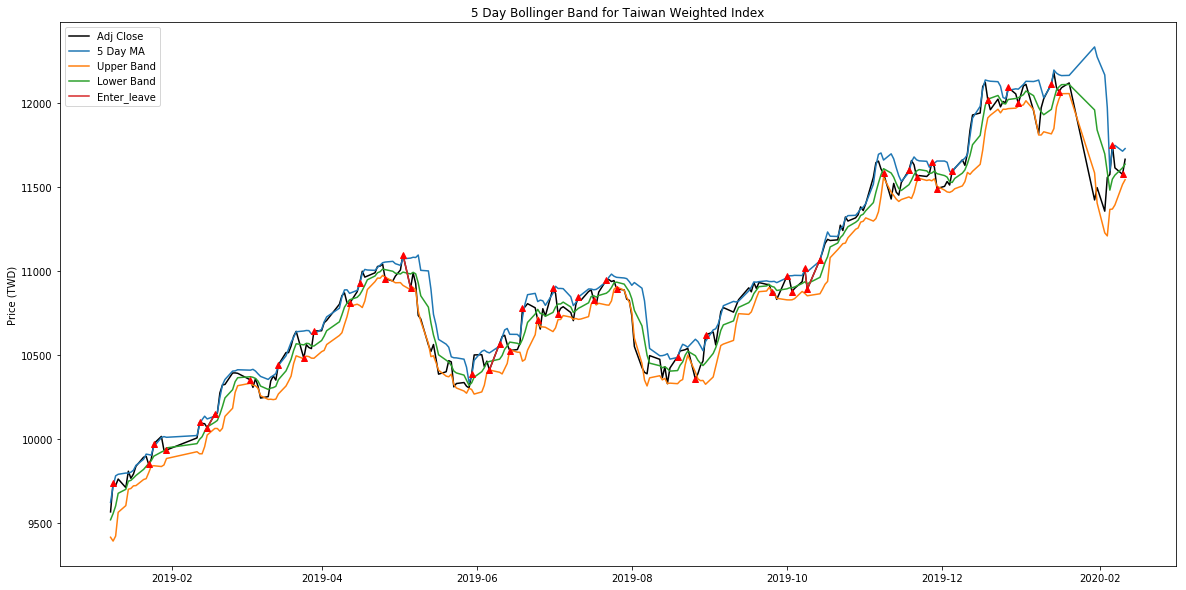

In [15]:
plt.figure(figsize=(20,10),linewidth = 0.5)
plt.plot(df['Date'],df['Adj Close'], color = 'black')
plt.plot(df['Date'],df['Upper Band'])
plt.plot(df['Date'],df['Lower Band'])
plt.plot(df['Date'],df['5 Day MA'])
plt.plot(df['Date'],df['Enter_leave'])

df.dropna(inplace = True, axis = 0)
plt.plot(df['Date'], df['Enter_leave'], '^', markersize=6, color='r')
plt.title('5 Day Bollinger Band for Taiwan Weighted Index')
plt.ylabel('Price (TWD)')
plt.legend(loc='upper left', labels =['Adj Close', '5 Day MA', 'Upper Band', 'Lower Band','Enter_leave'])
plt.show()